In [68]:
# Importing 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

In [69]:
# Loading Dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train.shape, y_test.shape

((60000, 28, 28), (10000,))

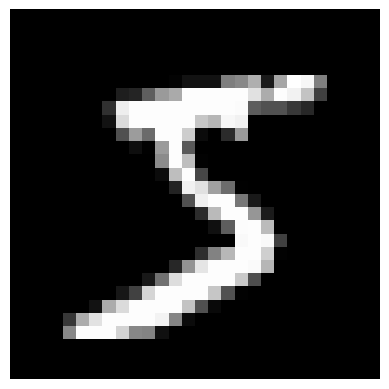

In [106]:
# Seeing the first image
def draw_img(row) : 
    image = row.reshape(28,28)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()
    
draw_img(x_train[0])

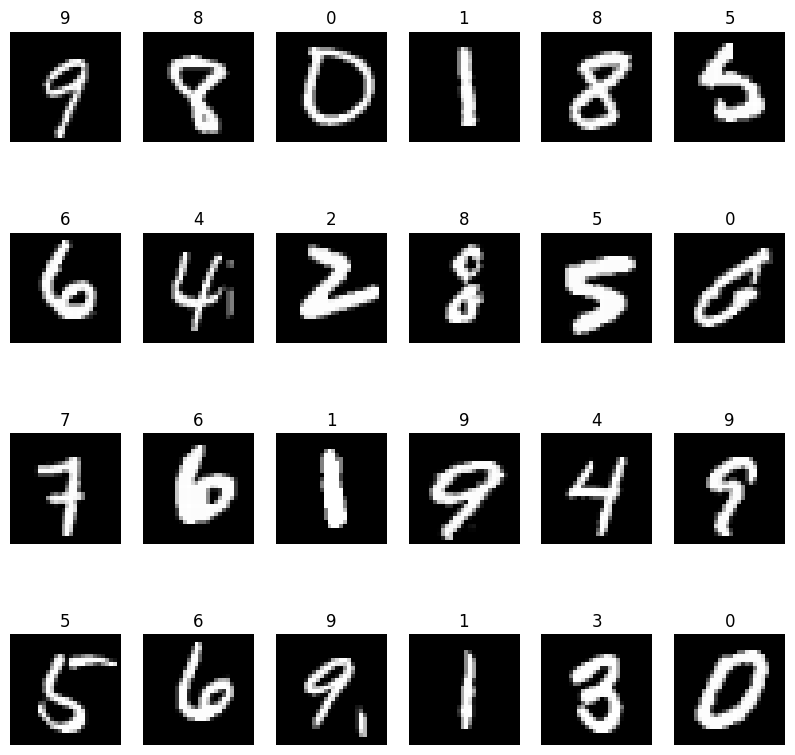

In [78]:
# Displaying 24 random Images
num_images = 24
rand_indices = np.random.randint(1, x_train.shape[0], num_images)

plt.figure(figsize = (10, 10))
for i in range(len(rand_indices)): 
    image = x_train[rand_indices[i]].reshape(28,28)
    plt.subplot(4, 6, i+1)
    plt.title(y_train[rand_indices[i]])
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()

## Preprocessing the data

In [79]:
np.max(x_train[0]), np.min(x_train[0])

(255, 0)

In [80]:
# making it in scale of 0-1
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train.shape

(60000, 28, 28)

In [84]:
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

x_train.shape

(60000, 784)

Need to try what if it is a 2D input

## Making the Neural network Model

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, InputLayer

In [ ]:
model = Sequential([
    InputLayer(input_shape= (28*28, )),
    Dense(units = 125, activation = 'relu'),
    Dense(units = 25, activation = 'relu'),
    Dense(units = 10, activation = 'softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

## Fitting and Evaluating the models

In [ ]:
from sklearn.model_selection import train_test_split

X, x_val, Y, y_val = train_test_split(x_train, y_train, test_size=0.2)
X.shape, y_val.shape

((48000, 784), (12000,))

In [ ]:
%%time
# Fitting the model
model.fit(X, Y, epochs = 10)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5318 - loss: 1.5677
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8186 - loss: 0.6040
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8664 - loss: 0.4539
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8986 - loss: 0.3520
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9090 - loss: 0.3151
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9173 - loss: 0.2826
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9223 - loss: 0.2697
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9267 - loss: 0.2456
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9301 - loss: 0.2385
Epoch 10/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9355 - loss: 0.2186
CPU times: total: 16.6 s
Wall time: 53.8 s


In [ ]:
pre = np.argmax(model.predict(X), axis=-1)

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(Y, pre)*100

93.98958333333334

In [ ]:
pre_val = np.argmax(model.predict(x_val), axis=-1)
accuracy_score(y_val, pre_val)*100

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


93.31666666666666

In [ ]:
# Let's see on test Data
pre_test = np.argmax(model.predict(x_test), axis=-1)
accuracy_score(y_test, pre_test)*100

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


93.67999999999999

Now Testing for multiple Epchos

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
# %%time
# eps = [10, 50, 100, 250, 500]
# cols = ['Epoch', 'Train_Acc', 'Val_Acc', 'Test_Acc', 'train_f1', 'val_f1', 'test_f1']
# rows = []
# for e in eps :
#     model.fit(X, Y, epochs=e)
#     train_pre = np.argmax(model.predict(X), axis=-1)
#     val_pre = np.argmax(model.predict(x_val), axis=-1)
#     test_pre = np.argmax(model.predict(x_test), axis=-1)
    
#     train_acc = accuracy_score(train_pre, Y)
#     val_acc = accuracy_score(val_pre, y_val)
#     test_acc = accuracy_score(test_pre, y_test)
    
#     train_f1 = f1_score(Y, train_pre, average='weighted')
#     val_f1 = f1_score(y_val, val_pre, average='weighted')
#     test_f1 = f1_score(y_test, test_pre, average='weighted')
    
#     new_row = [e, train_acc, val_acc, test_acc, train_f1, val_f1, test_f1]
#     rows.append(new_row)
    
# df = pd.DataFrame(rows, columns=cols)
# df
    

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9768 - loss: 0.0780
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9774 - loss: 0.0772
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9792 - loss: 0.0693
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9790 - loss: 0.0685
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9797 - loss: 0.0660
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9808 - loss: 0.0643
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9825 - loss: 0.0601
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9829 - loss: 0.0577
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9835 - loss: 0.0543
Epoch 10/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9847 - loss: 0.0535
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 978us/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1

Traceback (most recent call last):
  File "C:\Users\Ayush\AppData\Roaming\Python\Python312\site-packages\IPython\core\magics\execution.py", line 1340, in time
    exec(code, glob, local_ns)
  File "<timed exec>", line 5, in <module>
  File "c:\Python312\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 316, in fit
    callbacks.on_train_batch_end(step, logs)
  File "c:\Python312\Lib\site-packages\keras\src\callbacks\callback_list.py", line 106, in on_train_batch_end
    callback.on_train_batch_end(batch, logs=logs)
  File "c:\Python312\Lib\site-packages\keras\src\callbacks\progbar_logger.py", line 58, in on_train_batch_end
    self._update_progbar(batch, logs)
  File "c:\Python312\Lib\site-packages\keras\src\callbacks\progbar_logger.py", line 95, in _update_progbar
    self.progbar.update(self.seen, list(logs

In [74]:
# df = pd.DataFrame(rows, columns=cols)
# df

,Epoch,Train_Acc,Val_Acc,Test_Acc,train_f1,val_f1,test_f1
0,10,0.985750,0.965333,0.9694,0.985742,0.965272,0.969378
1,50,0.998146,0.968167,0.9702,0.998145,0.968120,0.970217
2,100,1.000000,0.972167,0.9746,1.000000,0.972142,0.974597
3,250,1.000000,0.972083,0.9748,1.000000,0.972062,0.974791
4,500,1.000000,0.972917,0.9756,1.000000,0.972882,0.975597


Here the model is getting overfit

In [75]:
model.fit(X, Y, epochs=100, batch_size=300)

Epoch 1/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 9.5788e-07
Epoch 2/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 1.0934e-06
Epoch 3/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.4418e-07
Epoch 4/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 9.0404e-07
Epoch 5/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 8.2845e-07
Epoch 6/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 8.2688e-07
Epoch 7/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 7.6841e-07
Epoch 8/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 7.8931e-07
Epoch 9/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 7.4539e-07
Epoch 10/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 7.2488e-07
Epoch 11/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 6.5548e-

In [85]:
train_pre = np.argmax(model.predict(X), axis=-1)
val_pre = np.argmax(model.predict(x_val), axis=-1)
test_pre = np.argmax(model.predict(x_test), axis=-1)

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [83]:
np.min(x_test), np.max(x_test), x_test.shape

(0.0, 1.0, (10000, 28, 28))

In [87]:
train_acc = accuracy_score(train_pre, Y)
val_acc = accuracy_score(val_pre, y_val)
test_acc = accuracy_score(test_pre, y_test)

train_acc, val_acc, test_acc

(1.0, 0.97275, 0.8988)

Now checking for the incrrecr predections in val set

In [89]:
in_val_idx = [x for x in range(len(y_val)) if y_val[x] != val_pre[x]]
len(in_val_idx)

327

In [95]:
len(in_val_idx)/len(y_val)

0.02725

In [90]:
inVal_x, inVal_y = x_val[in_val_idx], y_val[in_val_idx]
inVal_y.shape

(327,)

In [94]:
df = pd.DataFrame(inVal_y)
df.value_counts()

9    60
3    48
8    47
2    35
4    34
7    34
5    24
0    17
1    16
6    12
Name: count, dtype: int64

Number of miss clasified from the test set

In [97]:
in_test_idx = [x for x in range(len(y_test)) if y_test[x] != test_pre[x]]
len(in_test_idx)

1012

In [100]:
len(in_test_idx)/len(y_test) 

0.1012

In [102]:
intest_x, intest_y = x_test[in_test_idx], y_test[in_test_idx]
intest_y.shape

(1012,)

In [104]:
df = pd.DataFrame(intest_y)
df.value_counts()

8    566
9    122
6     84
4     74
7     43
3     34
2     33
5     27
0     25
1      4
Name: count, dtype: int64

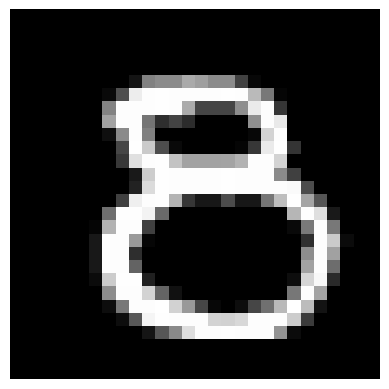

In [111]:
draw_img(intest_x[np.random.randint(len(intest_x))])